<a href="https://colab.research.google.com/github/aokikenichi/aokikenichi/blob/main/FT%E5%9B%B3%E8%A7%A3%E3%81%AE%E8%A8%80%E8%AA%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=922d664f750ec6c9273fdb819a85ba2c5cbf1abdf1c7f182f70a74b6b908023a
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
!pip install gapminder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from gapminder import gapminder
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [4]:
# Gapminderのデータセットを取得

In [5]:
df = gapminder
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


- 複数年のデータがあるのでとりあえず2007年で試す

In [6]:
df_2007 = df[df['year'] == 2007]
df_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


# へだたりを見せる

# 相関関係を表す

## 散布図

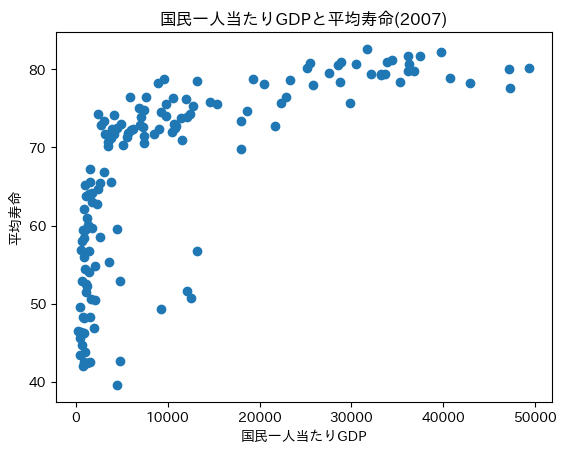

In [7]:
plt.figure()

plt.scatter(df_2007['gdpPercap'], df_2007['lifeExp'])

plt.title('国民一人当たりGDPと平均寿命(2007)')
plt.xlabel('国民一人当たりGDP')
plt.ylabel('平均寿命')

plt.show()

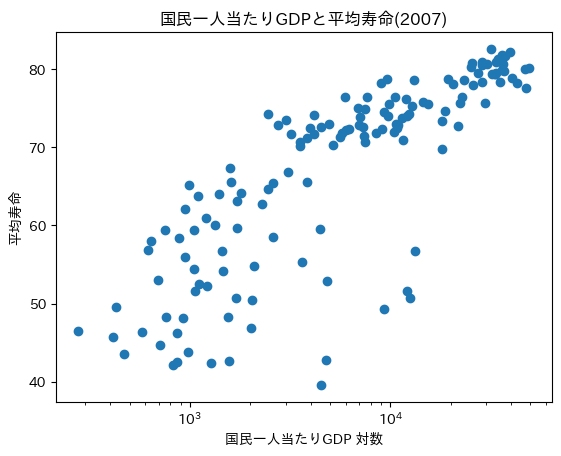

In [8]:
plt.figure()

plt.scatter(df_2007['gdpPercap'], df_2007['lifeExp'])

plt.xscale('log')

plt.title('国民一人当たりGDPと平均寿命(2007)')
plt.xlabel('国民一人当たりGDP 対数')
plt.ylabel('平均寿命')

plt.show()

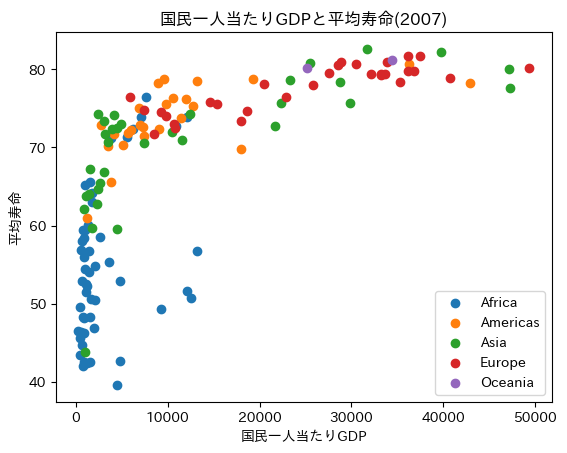

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for name, group in df_2007.groupby('continent'):
  ax.scatter(group['gdpPercap'], group['lifeExp'], label=name)

ax.legend()

plt.title('国民一人当たりGDPと平均寿命(2007)')
plt.xlabel('国民一人当たりGDP')
plt.ylabel('平均寿命')

plt.show()

- seaborn版

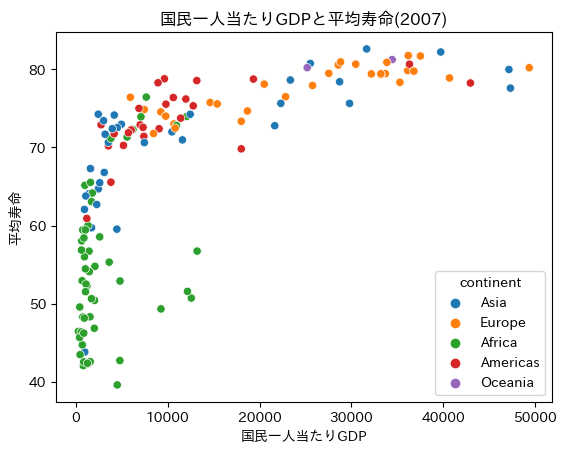

In [10]:
plt.figure()
sns.scatterplot(data=df_2007, x='gdpPercap', y='lifeExp', hue='continent')

plt.title('国民一人当たりGDPと平均寿命(2007)')
plt.xlabel('国民一人当たりGDP')
plt.ylabel('平均寿命')

plt.show()

## 棒と折れ線グラフの複合グラフ

In [11]:
df_plot = df[df['country'] == 'Japan']
df_plot.head()

,country,continent,year,lifeExp,pop,gdpPercap
792,Japan,Asia,1952,63.03,86459025,3216.956347
793,Japan,Asia,1957,65.50,91563009,4317.694365
794,Japan,Asia,1962,68.73,95831757,6576.649461
795,Japan,Asia,1967,71.43,100825279,9847.788607
796,Japan,Asia,1972,73.42,107188273,14778.786360


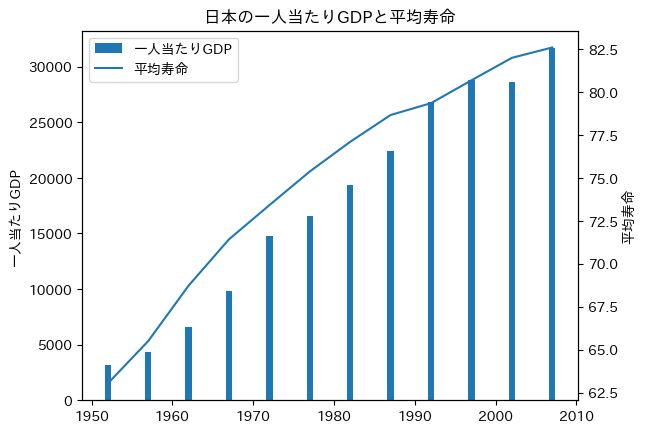

In [12]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()
ax1.bar(df_plot['year'], df_plot['gdpPercap'], label='一人当たりGDP')
ax2.plot(df_plot['year'], df_plot['lifeExp'], label='平均寿命')

ax1.set_title('日本の一人当たりGDPと平均寿命')
ax1.set_ylabel('一人当たりGDP')
ax2.set_ylabel('平均寿命')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1+handler2, label1+label2)
fig.show()

## つなげた散布図（かたつむりチャート）

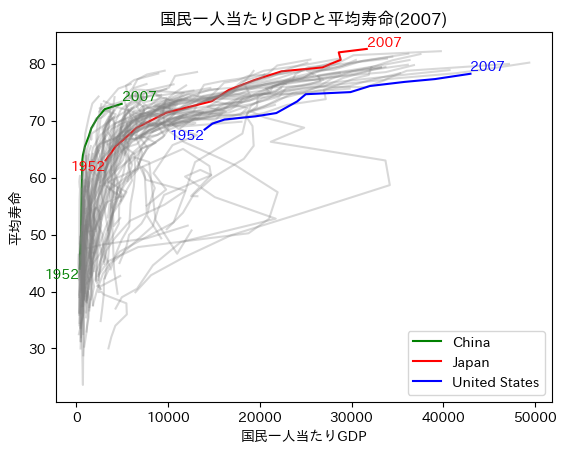

In [13]:
plt.figure()

for country in df['country'].unique():
  # 値が大きすぎるので一旦削除
  if country == 'Kuwait':
    continue
  
  # 着目した国だけ色付け
  if country == 'Japan':
    color = 'red'
    alpha = 1
    label = country
  elif country == 'United States':
    color = 'blue'
    alpha = 1
    label = country
  elif country == 'China':
    color = 'green'
    alpha = 1
    label = country
  else:
    color = 'gray'
    alpha = 0.3
    label = ''
  
  df_plot = df[df['country'] == country]
  plt.plot(df_plot['gdpPercap'], df_plot['lifeExp'], c=color, alpha=alpha, label=label)

  # 着目した国だけ年号ラベル
  if label == country:
    for y in [1952, 2007]:
      if y == 1952:
        va = 'top'
        ha = 'right'
      else:
        va = 'bottom'
        ha = 'left'
      plt.text(df_plot[df_plot['year'] == y]['gdpPercap'], df_plot[df_plot['year'] == y]['lifeExp'], y, va=va, ha=ha, c=color)

plt.legend()

plt.title('国民一人当たりGDPと平均寿命(2007)')
plt.xlabel('国民一人当たりGDP')
plt.ylabel('平均寿命')

plt.show()

## バブルチャート

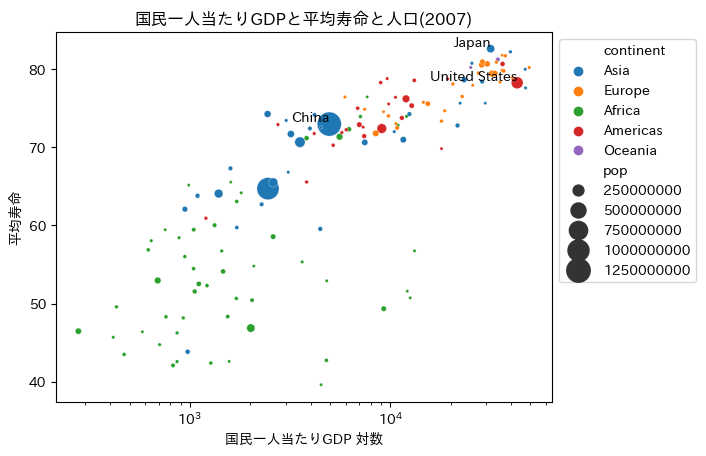

In [14]:
plt.figure()
sns.scatterplot(data=df_2007, x='gdpPercap', y='lifeExp', hue='continent', size='pop', sizes=(5, 300))

# 国名
for country in ['Japan', 'United States', 'China']:
  plt.text(df_2007[df_2007['country'] == country]['gdpPercap'], df_2007[df_2007['country'] == country]['lifeExp'], country, va='bottom', ha='right')
plt.title('国民一人当たりGDPと平均寿命と人口(2007)')
plt.xlabel('国民一人当たりGDP 対数')
plt.ylabel('平均寿命')

plt.xscale('log')

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## ヒートマップ

In [15]:
# ヒートマップ用に横展開
df_tmp = df.pivot(index='country', columns='year', values='gdpPercap')
df_tmp = df_tmp.reset_index()
df_tmp.head()

year,country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
0,Afghanistan,779.445314,820.853030,853.100710,836.197138,739.981106,786.113360,978.011439,852.395945,649.341395,635.341351,726.734055,974.580338
1,Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
2,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,4797.295051,5288.040382,6223.367465
3,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,2277.140884,2773.287312,4797.231267
4,Argentina,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640


In [16]:
# 国数が多いと分かりにくいので2007時点で人口上位20カ国に絞る
## かつ人口順に
tmp = df_2007.sort_values('pop', ascending=False).reset_index(drop=True)[0:20]
tmp_li = list(tmp['country'])


df_tmp['order'] = df_tmp['country'].apply(lambda x: tmp_li.index(x) if x in tmp_li else -1)
df_tmp = df_tmp[df_tmp['order'] > -1]
df_tmp = df_tmp.sort_values('order')
df_plot = df_tmp.reset_index(drop=True)
df_plot.index = df_plot['country']
df_plot = df_plot.drop(['country', 'order'], axis=1)
df_plot.head()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
China,400.448611,575.987001,487.674018,612.705693,676.900092,741.237470,962.421381,1378.904018,1655.784158,2289.234136,3119.280896,4959.114854
India,546.565749,590.061996,658.347151,700.770611,724.032527,813.337323,855.723538,976.512676,1164.406809,1458.817442,1746.769454,2452.210407
United States,13990.482080,14847.127120,16173.145860,19530.365570,21806.035940,24072.632130,25009.559140,29884.350410,32003.932240,35767.433030,39097.099550,42951.653090
Indonesia,749.681655,858.900271,849.289770,762.431772,1111.107907,1382.702056,1516.872988,1748.356961,2383.140898,3119.335603,2873.912870,3540.651564
Brazil,2108.944355,2487.365989,3336.585802,3429.864357,4985.711467,6660.118654,7030.835878,7807.095818,6950.283021,7957.980824,8131.212843,9065.800825


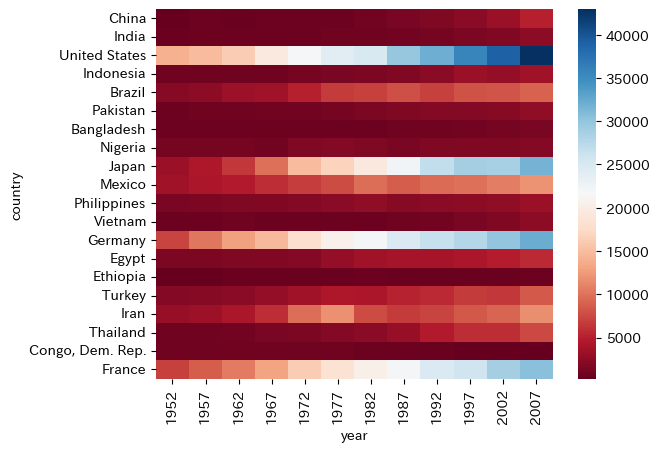

In [17]:
plt.figure()
sns.heatmap(data=df_plot, cmap='RdBu')
plt.show()

# ランキングを表す

## 順位付け棒グラフ（横）

In [29]:
# 国数が多いと分かりにくいので2007時点で人口上位10カ国に絞る
## かつ人口順に
df_plot = df_2007.sort_values('pop', ascending=False).reset_index(drop=True)[0:10]
df_plot

,country,continent,year,lifeExp,pop,gdpPercap
0,China,Asia,2007,72.961,1318683096,4959.114854
1,India,Asia,2007,64.698,1110396331,2452.210407
2,United States,Americas,2007,78.242,301139947,42951.653090
3,Indonesia,Asia,2007,70.650,223547000,3540.651564
4,Brazil,Americas,2007,72.390,190010647,9065.800825
5,Pakistan,Asia,2007,65.483,169270617,2605.947580
6,Bangladesh,Asia,2007,64.062,150448339,1391.253792
7,Nigeria,Africa,2007,46.859,135031164,2013.977305
8,Japan,Asia,2007,82.603,127467972,31656.068060
9,Mexico,Americas,2007,76.195,108700891,11977.574960


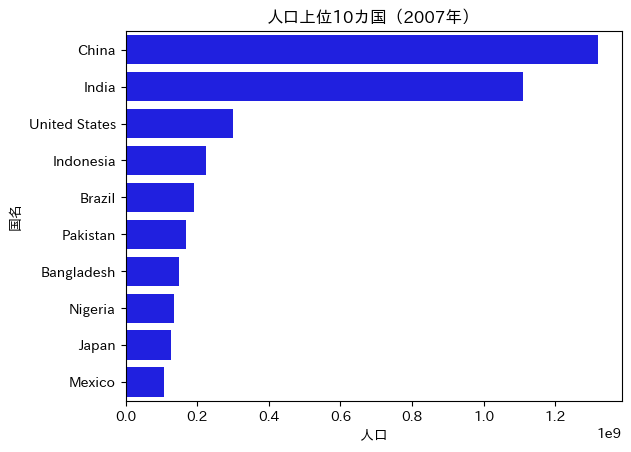

In [30]:
sns.barplot(data=df_plot, x='pop', y='country', color='blue')
plt.title('人口上位10カ国（2007年）')
plt.xlabel('人口')
plt.ylabel('国名')
plt.show()

## 順位付け棒グラフ（縦）

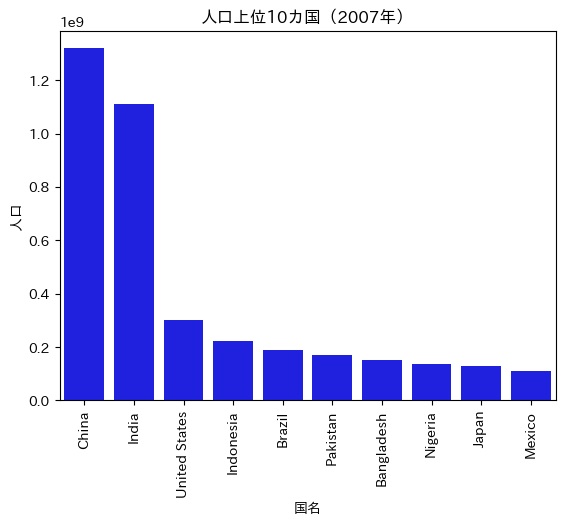

In [105]:
sns.barplot(data=df_plot, x='country', y='pop', color='blue')
plt.title('人口上位10カ国（2007年）')
plt.xlabel('国名')
plt.ylabel('人口')
plt.xticks(rotation=90)
plt.show()

## 順位付け比例シンボルチャート

In [100]:
df_plot['rank']=df_plot.index + 1
df_plot

,country,continent,year,lifeExp,pop,gdpPercap,rank
0,Norway,Europe,2007,80.196,4627926,49357.190170,1
1,Kuwait,Asia,2007,77.588,2505559,47306.989780,2
2,Singapore,Asia,2007,79.972,4553009,47143.179640,3
3,United States,Americas,2007,78.242,301139947,42951.653090,4
4,Ireland,Europe,2007,78.885,4109086,40675.996350,5
...,...,...,...,...,...,...,...
137,Guinea-Bissau,Africa,2007,46.388,1472041,579.231743,138
138,Zimbabwe,Africa,2007,43.487,12311143,469.709298,139
139,Burundi,Africa,2007,49.580,8390505,430.070692,140
140,Liberia,Africa,2007,45.678,3193942,414.507341,141


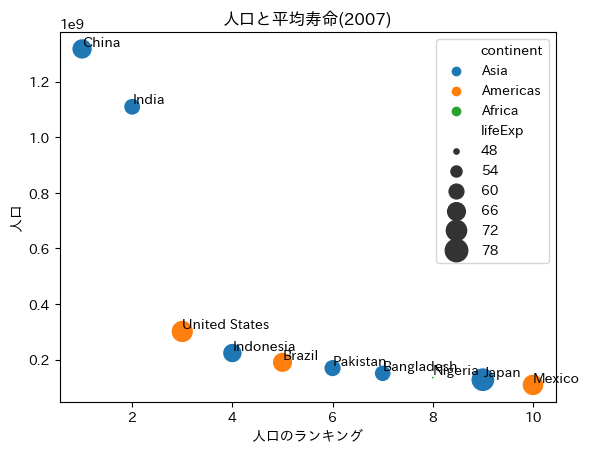

In [54]:
plt.figure()

sns.scatterplot(data=df_plot, x='rank', y='pop', hue='continent', size='lifeExp', sizes=(5, 300))


for i in range(len(df_plot)):
  plt.text(df_plot['rank'][i], df_plot['pop'][i], df_plot['country'][i], va='bottom', ha='left')

plt.title('人口と平均寿命(2007)')
plt.xlabel('人口の順位')
plt.ylabel('人口')

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## ドット・ストリップ・プロット

In [97]:
df_plot = df_2007.sort_values('gdpPercap', ascending=False).reset_index(drop=True)

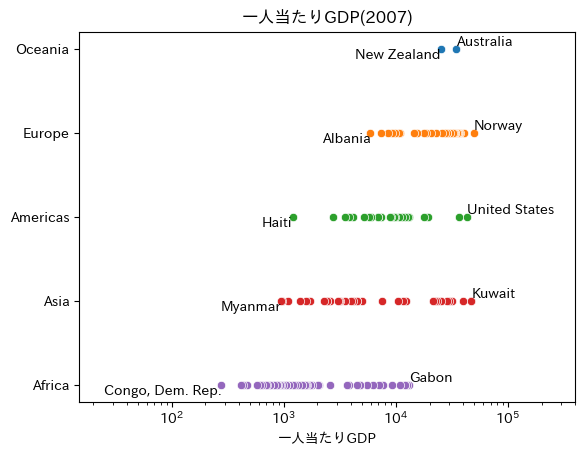

In [98]:
plt.figure()

for i, con in enumerate(['Oceania', 'Europe', 'Americas', 'Asia', 'Africa']):
  sns.scatterplot(data=df_plot[df_plot['continent'] == con], x='gdpPercap', y=5-i, sizes=20)
  df_plot_text = df_plot[df_plot['continent'] == con].reset_index()
  plt.text(df_plot_text.loc[0, 'gdpPercap'], 5-i, df_plot_text.loc[0, 'country'], va='bottom', ha='left')
  plt.text(df_plot_text.loc[len(df_plot_text)-1, 'gdpPercap'], 5-i, df_plot_text.loc[len(df_plot_text)-1, 'country'], va='top', ha='right')

plt.xscale('log')

plt.title('一人当たりGDP(2007)')
plt.xlabel('一人当たりGDP')
plt.yticks([1, 2, 3, 4, 5], ['Africa', 'Asia', 'Americas', 'Europe', 'Oceania'])

plt.xlim(1.5*10**1, 4*10**5)


plt.show()

### スロープチャート

In [159]:
min(df.year) # 1952 2007
df_1952 = df[df['year'] == 1952]
df_2007 = df[df['year'] == 2007]
# 国数が多いと分かりにくいので2007時点で人口上位8カ国に絞る
## かつ人口順に
df_2007_10 = df_2007.sort_values('pop', ascending=False).reset_index(drop=True)[0:10]

In [157]:
df_2007_10

,country,continent,year,lifeExp,pop,gdpPercap
0,China,Asia,2007,72.961,1318683096,4959.114854
1,India,Asia,2007,64.698,1110396331,2452.210407
2,United States,Americas,2007,78.242,301139947,42951.653090
3,Indonesia,Asia,2007,70.650,223547000,3540.651564
4,Brazil,Americas,2007,72.390,190010647,9065.800825


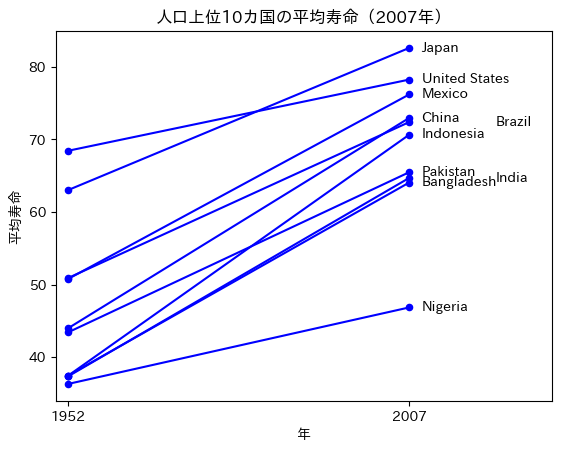

In [181]:
plt.figure()

for i, c in enumerate(df_2007_10['country']):
  df_tmp1 = df_2007_10[df_2007_10['country'] == c]
  df_tmp2 = df_1952[df_1952['country'] == c]
  df_plot = pd.concat([df_tmp1, df_tmp2], axis=0)
  plt.plot(df_plot['year'], df_plot['lifeExp'], color='blue')
  plt.scatter(df_tmp2['year'], df_tmp2['lifeExp'], s=20, c='blue')
  plt.scatter(df_tmp1['year'], df_tmp1['lifeExp'], s=20, c='blue')
  if c in ['Brazil', 'India']:
    margin_x = 14
  else:
    margin_x = 2
  plt.text(2007+margin_x, df_plot[df_plot.year == 2007]['lifeExp'], c, va='center', ha='left')
  plt.xlim(1950, 2030)

plt.title('人口上位10カ国の平均寿命（2007年）')
plt.xlabel('年')
plt.xticks([1952, 2007], ['1952', '2007'])
plt.ylabel('平均寿命')

plt.show()

### ロリポップチャート

In [101]:
# 国数が多いと分かりにくいので2007時点で人口上位10カ国に絞る
## かつ人口順に
df_plot = df_2007.sort_values('pop', ascending=False).reset_index(drop=True)[0:10]
df_plot['rank']=df_plot.index + 1
df_plot

,country,continent,year,lifeExp,pop,gdpPercap,rank
0,China,Asia,2007,72.961,1318683096,4959.114854,1
1,India,Asia,2007,64.698,1110396331,2452.210407,2
2,United States,Americas,2007,78.242,301139947,42951.653090,3
3,Indonesia,Asia,2007,70.650,223547000,3540.651564,4
4,Brazil,Americas,2007,72.390,190010647,9065.800825,5
5,Pakistan,Asia,2007,65.483,169270617,2605.947580,6
6,Bangladesh,Asia,2007,64.062,150448339,1391.253792,7
7,Nigeria,Africa,2007,46.859,135031164,2013.977305,8
8,Japan,Asia,2007,82.603,127467972,31656.068060,9
9,Mexico,Americas,2007,76.195,108700891,11977.574960,10


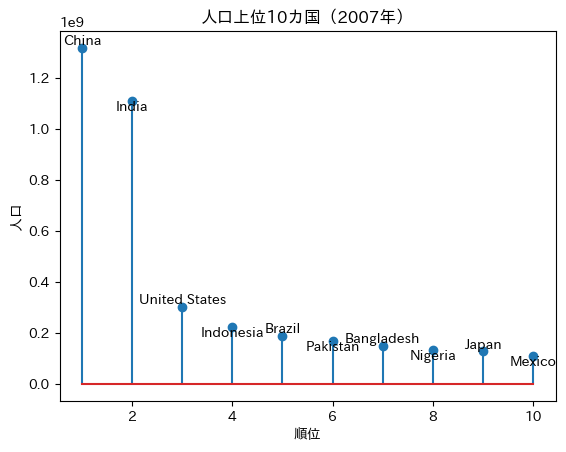

In [109]:
plt.stem(df_plot['rank'], df_plot['pop'])

for i in range(len(df_plot)):
  if i % 2 == 0:
    pos='bottom'
  else:
    pos='top'
  plt.text(df_plot['rank'][i], df_plot['pop'][i], df_plot['country'][i], va=pos, ha='center')

plt.title('人口上位10カ国（2007年）')
plt.xlabel('順位')
plt.ylabel('人口')
plt.show()

## 順位変動グラフ

In [21]:
# 順位変動グラフ用に横展開
df_tmp = df.pivot(index='country', columns='year', values='gdpPercap')
df_tmp = df_tmp.reset_index()
df_rank = df_tmp.iloc[:, 2:].rank(ascending=False)
df_rank.head()

year,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
0,115.0,115.0,120.0,126.0,124.0,113.0,118.0,132.0,133.0,130.0,124.0
1,76.0,73.0,69.0,72.0,76.0,80.0,80.0,88.0,83.0,75.0,73.0
2,57.0,67.0,65.0,64.0,62.0,59.0,60.0,67.0,71.0,72.0,71.0
3,48.0,52.0,52.0,55.0,85.0,88.0,91.0,86.0,92.0,91.0,79.0
4,22.0,27.0,32.0,37.0,41.0,45.0,44.0,42.0,38.0,49.0,42.0


In [22]:
df_rank = pd.merge(df_tmp.loc[:, ['country']], df_rank, left_index=True, right_index=True)
df_rank.head()

year,country,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
0,Afghanistan,115.0,115.0,120.0,126.0,124.0,113.0,118.0,132.0,133.0,130.0,124.0
1,Albania,76.0,73.0,69.0,72.0,76.0,80.0,80.0,88.0,83.0,75.0,73.0
2,Algeria,57.0,67.0,65.0,64.0,62.0,59.0,60.0,67.0,71.0,72.0,71.0
3,Angola,48.0,52.0,52.0,55.0,85.0,88.0,91.0,86.0,92.0,91.0,79.0
4,Argentina,22.0,27.0,32.0,37.0,41.0,45.0,44.0,42.0,38.0,49.0,42.0


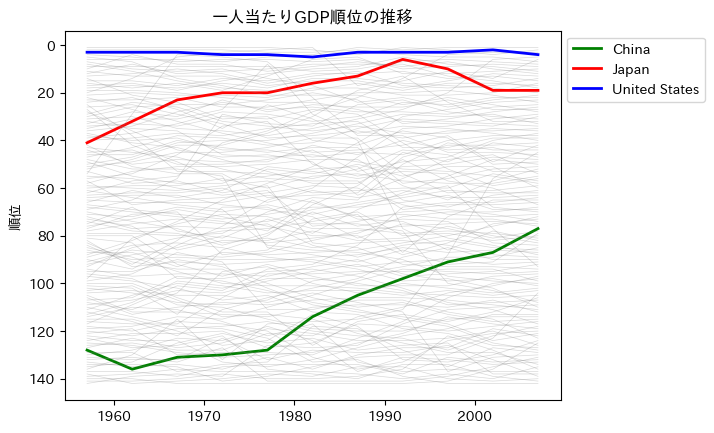

In [23]:
fig, ax = plt.subplots()

for country in df_rank['country']:
  df_plot = df_rank[df_rank['country'] == country]
  df_plot = df_plot.drop('country', axis=1)
  df_plot = df_plot.T.reset_index()
  df_plot.columns = ['year', 'rank']
  df_plot['rank'] = df_plot['rank'].astype('int')
  df_plot
  # 着目した国だけ色付け
  if country == 'Japan':
    color = 'red'
    lw = 2
    alpha = 1
    label = country
  elif country == 'United States':
    color = 'blue'
    lw = 2
    alpha = 1
    label = country
  elif country == 'China':
    color = 'green'
    lw = 2
    alpha = 1
    label = country
  else:
    color = 'gray'
    lw = 0.5
    alpha = 0.3
    label = ''

  ax.plot(df_plot['year'], df_plot['rank'], color=color, alpha=alpha, lw=lw, label=label)

ax.invert_yaxis()

plt.title('一人当たりGDP順位の推移')
plt.ylabel('順位')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

In [64]:
df_plot.value_counts('continent')

continent
Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
dtype: int64